In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Initial exploration

In [9]:
df = pd.read_csv("./Data/dataset_mood_smartphone.csv")

print(df[df.value.isnull()])


df = df.dropna(axis=0, how='any')
df[df.variable == 'circumplex.arousal'].head()

       Unnamed: 0       id                     time            variable  value
5708         5709  AS14.01  2014-04-02 18:00:00.000  circumplex.arousal    NaN
5730         5731  AS14.01  2014-04-07 15:00:00.000  circumplex.arousal    NaN
5772         5773  AS14.01  2014-04-16 12:00:00.000  circumplex.arousal    NaN
5796         5797  AS14.01  2014-04-21 13:00:00.000  circumplex.arousal    NaN
5835         5836  AS14.01  2014-04-29 09:00:00.000  circumplex.arousal    NaN
6324         6325  AS14.05  2014-04-01 19:00:00.000  circumplex.arousal    NaN
6378         6379  AS14.05  2014-04-13 13:00:00.000  circumplex.arousal    NaN
6433         6434  AS14.05  2014-04-24 18:00:00.000  circumplex.arousal    NaN
6667         6668  AS14.06  2014-05-02 10:00:00.000  circumplex.arousal    NaN
6792         6793  AS14.07  2014-04-12 00:00:00.000  circumplex.arousal    NaN
7036         7037  AS14.08  2014-04-06 12:00:00.000  circumplex.arousal    NaN
7255         7256  AS14.09  2014-04-07 18:00:00.000 

,Unnamed: 0,id,time,variable,value
5641,5642,AS14.01,2014-02-26 13:00:00.000,circumplex.arousal,-1.0
5642,5643,AS14.01,2014-02-26 15:00:00.000,circumplex.arousal,-1.0
5643,5644,AS14.01,2014-02-26 18:00:00.000,circumplex.arousal,0.0
5644,5645,AS14.01,2014-02-26 21:00:00.000,circumplex.arousal,1.0
5645,5646,AS14.01,2014-02-27 09:00:00.000,circumplex.arousal,-2.0


In [164]:
variables = np.unique(df.variable.values)
p = variables.shape[0]

time_points = np.unique(df.time.values)
T = time_points.shape[0]

n_response = np.sum([df.variable.values == 'mood'])

ids = np.unique(df.id.values)
n_ids = ids.shape[0]

id_df_list = [df[df.id == ids[i]] for i in range(n_ids)]

mood_timestamps = df.time[df.variable == 'mood']

In [165]:
print(p, T, n_response, n_ids)

timestamp = mood_timestamps[125]
t1 = mood_timestamps[1]
t2 = mood_timestamps[2]

response_times = df.time[df.variable == 'mood'].values
print(response_times)

mood_times = df.time[df.variable == 'mood'].values
mood_measurements = df.value[df.variable == 'mood'].values
measurement_types = np.unique(df.variable[df.variable != 'mood'].values).tolist()
measurement_df = df[df.variable != 'mood']
measurement_times = measurement_df.time.values
X = np.zeros((len(measurement_types), mood_measurements.shape[0]))
i = 0

print(np.nonzero(np.isin(df.variable.values, measurement_types[2]))[0])
print(measurement_types)

mean_types = np.array(['activity', 'circumplex.valence', 'circumplex.arousal'])
sum_types = np.array(list(filter(lambda x: x not in mean_types, measurement_types)))

print(sum_types)

19 336907 5641 27
['2014-02-26 13:00:00.000' '2014-02-26 15:00:00.000'
 '2014-02-26 18:00:00.000' ..., '2014-05-30 19:00:00.000'
 '2014-05-30 20:00:00.000' '2014-05-31 12:00:00.000']
[234593 234594 234595 ..., 308866 308867 308868]
['activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call', 'circumplex.arousal', 'circumplex.valence', 'screen', 'sms']
['appCat.builtin' 'appCat.communication' 'appCat.entertainment'
 'appCat.finance' 'appCat.game' 'appCat.office' 'appCat.other'
 'appCat.social' 'appCat.travel' 'appCat.unknown' 'appCat.utilities'
 'appCat.weather' 'call' 'screen' 'sms']


In [166]:
def time_earlier(t1, t2):
    year1 = int(t1[0:4])
    year2 = int(t2[0:4])
    if year1 == year2:
        month1 = int(t1[5:7])
        month2 = int(t2[5:7])
        if month1 == month2:
            day1 = int(t1[8:10])
            day2 = int(t2[8:10])
            if day1 == day2:
                hour1 = int(t1[11:13])
                hour2 = int(t2[11:13])
                if hour1 == hour2:
                    min1 = int(t1[14:16])
                    min2 = int(t2[14:16])
                    if min1 == min2:
                        sec1 = int(t1[17:19])
                        sec2 = int(t2[17:19])
                        if sec1 == sec2:
                            subsec1 = int(t1[20:23])
                            subsec2 = int(t2[20:23])
                            return subsec1 <= subsec2
                        else:
                            return sec1 < sec2
                    else:
                        return min1 < min2

                else:
                    return hour1 < hour2

            else:
                return day1 < day2
        else:
            return month1 < month2
    else:
        return year1 < year2

In [167]:
def time_difference(t1, t2):
    year1 = int(t1[0:4])
    year2 = int(t2[0:4])
    month1 = int(t1[5:7])
    month2 = int(t2[5:7])
    day1 = int(t1[8:10])
    day2 = int(t2[8:10])
    hour1 = int(t1[11:13])
    hour2 = int(t2[11:13])
    min1 = int(t1[14:16])
    min2 = int(t2[14:16])
    sec1 = int(t1[17:19])
    sec2 = int(t2[17:19])
    subsec1 = int(t1[20:23])
    subsec2 = int(t2[20:23])
    datetime1 = datetime.datetime(year1, month1, day1, hour1, min1, sec1, subsec1*1000)
    datetime2 = datetime.datetime(year2, month2, day2, hour2, min2, sec2, subsec2*1000)
    return (datetime2 - datetime1).total_seconds()

time_difference(mood_timestamps[1], mood_timestamps[0])

-7200.0

# Sum between recorded respones

In [114]:
def create_time_series(df, umt):
    mood_times = df.time[df.variable == 'mood'].values
    mood_values = df.value[df.variable == 'mood'].values
    n = mood_values.shape[0]

    #unique_mt = np.unique(df.variable[df.variable != 'mood'].values).tolist()
    unique_mt = umt
    measurement_types = df.variable.values[df.variable != 'mood']
    measurement_values = df.value.values[df.variable != 'mood']
    measurement_times = df.time.values[df.variable != 'mood']
    l = measurement_times.shape[0]

    mean_types = np.array(['activity', 'circumplex.valence', 'circumplex.arousal'])
    sum_types = np.array(list(filter(lambda x: x not in mean_types, unique_mt)))

    X = np.zeros((len(unique_mt), n))
    indices_to_drop = np.array([])
    j = 0
    for m_time in mood_times:
        earlier_time_indices = np.array([k for k in range(l)
                                         if time_earlier(measurement_times[k], m_time)
                                         and k not in indices_to_drop])
        if len(earlier_time_indices) == 0:
            continue
        earlier_types = measurement_types[earlier_time_indices]
        i = 0
        for m_type in unique_mt:
            earlier_measurement_indices = np.nonzero(np.isin(earlier_types, m_type))[0]
            if len(earlier_measurement_indices) != 0:
                measurement_indices = earlier_time_indices[earlier_measurement_indices]
                if m_type in sum_types:
                    # Sum all measurement types that should be added up
                    X[i, j] = np.sum(measurement_values[measurement_indices])
                elif m_type in mean_types:
                    X[i, j] = np.mean(measurement_values[measurement_indices])
                indices_to_drop = np.concatenate((indices_to_drop, measurement_indices))
            i += 1
        j += 1

    y = mood_values

    return X, y

In [172]:
df = pd.read_csv("./Data/dataset_mood_smartphone.csv")
df = df.dropna(axis=0, how='any')
ids = np.unique(df.id.values)
user_df = df[df.id == ids[3]]
X, y = create_time_series(user_df, measurement_types)

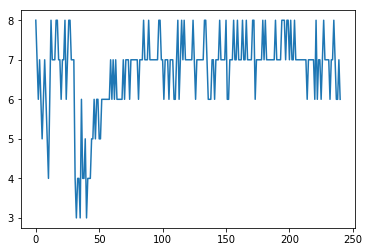

40.0
['activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call', 'circumplex.arousal', 'circumplex.valence', 'screen', 'sms']
40.0


In [174]:
plt.plot(np.arange(len(y)), y)
plt.show()

print(np.sum(X[17,:]))
print(measurement_types)
print(np.sum(user_df.value.values[user_df.variable == 'sms']))

In [178]:
def shift_and_add_time(df, X, y):
    timestamps = df.time.values[df.variable == 'mood']
    t_delta = np.array([time_difference(timestamps[i], timestamps[i+1]) for i in range(y.shape[0] - 1)])
    sX = X[:, :-1]
    sX = np.vstack((sX, t_delta))
    sy = y[1:]
    
    return sX, sy

In [179]:
sX, sy = shift_and_add_time(user_df, X, y)
print(sX.shape)

(19, 240)


In [159]:
cols = np.concatenate((measurement_types, np.array(['time', 'mood'])))
data = np.vstack((sX, sy)).T
proc_df = pd.DataFrame(data=data, columns=cols)
proc_df.head()
proc_df.to_csv('processed_data.csv', index=False)

# Recurrent Neural Network

# Additional code

In [ ]:
def df_timesplit(df):
    ret_df = df
    ret_df.insert(2, 'date', [ret_df.iloc[i].time[0:10] for i in range(len(ret_df))])
    ret_df.insert(3, 'hour', [ret_df.iloc[i].time[11:] for i in range(len(ret_df))])
    ret_df.drop(['time'], axis=1)
    return ret_df

# Average of single days

In [8]:
def extract_sum(var_name, days):
    array = [days[i][days[i].variable == var_name] for i in range(len(days))]
    total = [np.sum(array[i].value) for i in range(len(array))]
    return total


def extract_user_data(user_id, raw_df):
    split_df = pd.DataFrame(raw_df.time.str.split(' ', 1).tolist(), columns=['day', 'time'])
    df = raw_df.drop('time', axis=1)
    df.insert(2, 'day', split_df.day.tolist())
    df.insert(3, 'time', split_df.time.tolist())
    
    unique_days = df.day.unique().tolist()
    days = [df[df.day == unique_days[i]] for i in range(len(unique_days))]
    
    moods = [days[i][days[i].variable == 'mood'] for i in range(len(days))]
    response = [np.mean(moods[i].value) for i in range(len(moods))]
    
    total_calls = extract_sum('call', days)
    total_texts = extract_sum('sms', days)
    total_screen_time = extract_sum('screen', days)
    total_builtin = extract_sum('appCat.builtin', days)
    total_communication = extract_sum('appCat.communication', days)
    total_entertainment = extract_sum('appCat.entertainment', days)
    total_finance = extract_sum('appCat.finance', days)
    total_game = extract_sum('appCat.game', days)
    total_office = extract_sum('appCat.office', days)
    total_other = extract_sum('appCat.other', days)
    total_social = extract_sum('appCat.social', days)
    total_travel = extract_sum('appCat.travel', days)
    total_unknown = extract_sum('appCat.unknown', days)
    total_utilities = extract_sum('appCat.utilities', days)
    total_weather = extract_sum('appCat.weather', days)
    
    y = np.array(response[1:])
    x = np.array([total_calls[:-1], total_texts[:-1], total_screen_time[:-1], total_builtin[:-1]
             , total_communication[:-1], total_entertainment[:-1], total_finance[:-1]
             , total_game[:-1], total_office[:-1], total_social[:-1]
             , total_travel[:-1], total_utilities[:-1], total_weather[:-1]]).T
    
    return x,y

In [10]:
full_df = pd.read_csv('./Data/dataset_mood_smartphone.csv')
id_list = full_df.id.unique()
train_ids = id_list[:18]

x,y = extract_user_data(train_ids[1], full_df)

for i in range(len(train_ids)):
    x,y = extract_user_data(train_ids[i], full_df)
    if i == 0:
        X, Y = x, y
    else:
        X = np.concatenate((X, x))
        Y = np.concatenate((Y, y))
        
np.savetxt('x.txt', X)
np.savetxt('y.txt', Y)

(2016, 13)
(2016,)


In [112]:
def rnn_reshape(X, y, l):
    #Reshaping
    m = X.shape[0]
    n = X.shape[1]
    cut = n % l
    rX = X[:, cut:].reshape(n//l, l, m)
    ry = y[cut:]

    return rX, ry

def rnn_reshape_2(X, y, l, rb):
    eX = np.empty((X.shape[0]*l//rb, X.shape[1], X.shape[2]))
    #1000 8 14
    fX = X.reshape((X.shape[0]*l, X.shape[2]))
    #1000 14
    for i in range(eX.shape[1]):
        eX[i, :, :] = fX[:l, :]
        fX = np.roll(fX, -rb, axis = 0)
    ey = y
    return eX, ey

In [113]:
X = np.arange(14000).reshape((14, 1000))
y = np.arange(1000)
l = 8

print(X.shape)
print(y.shape)

X, y = rnn_reshape(X, y, l)
print(X.shape)
print(y.shape)
print(X[0:5, :, 0])

X, y = rnn_reshape_2(X, y, l)
print(X.shape)
print(y.shape)

print(X[0:5, :, 0])

(14, 1000)
(1000,)
(125, 8, 14)
(1000,)
[[  0  14  28  42  56  70  84  98]
 [112 126 140 154 168 182 196 210]
 [224 238 252 266 280 294 308 322]
 [336 350 364 378 392 406 420 434]
 [448 462 476 490 504 518 532 546]]
(500, 8, 14)
(1000,)
[[   0.   14.   28.   42.   56.   70.   84.   98.]
 [  28.   42.   56.   70.   84.   98.  112.  126.]
 [  56.   70.   84.   98.  112.  126.  140.  154.]
 [  84.   98.  112.  126.  140.  154.  168.  182.]
 [ 112.  126.  140.  154.  168.  182.  196.  210.]]


In [149]:
def create_time_series(user_df, u_vars, time_arr=None):
    """Creates a matrix containing information on activity between specific time points

    user_df - the data frame corresponding to a specific user, as seen when importing data from
    dataset_mood_smartphone.csv
    u_vars - numpy array containing information on variables that should be considered
    time_arr - numpy array containing time points (default = None). If None, then time points of mood measurement
    is used
    """

    # Getting time grid
    if time_arr is None:
        assert 'mood' not in u_vars
        # Data frame with mood rows removed
        nm_user_df = user_df[user_df.variable == 'mood']
        tg = nm_user_df.time.values

    else:
        tg = time_arr

    # Values, times and variables corresponding to variable list
    var_df = user_df[user_df.variable.isin(u_vars)]
    var_vals = var_df.value.values
    var_times = var_df.time.values
    var_arr = var_df.variable.values
    # Number of variables values, and number of time points
    n = tg.shape[0]
    l = var_times.shape[0]

    #Variables to sum, variables to average
    m_vars = np.array(['activity', 'circumplex.valence', 'circumplex.arousal', 'mood'])
    s_vars = np.array(list(filter(lambda x: x not in m_vars, u_vars)))

    #Covariate matrix
    X = np.zeros((len(u_vars), n))
    #Indices of values that should not be included next loop
    drop_list = np.array([])

    j = 0
    #Iteration through time array
    for t in tg:
        #Indices of time points preceding current time point
        prev_t_i = np.array([k for k in range(l)
                             if t_delta(var_times[k], t) >= 0
                             and k not in drop_list])
        if len(prev_t_i) == 0:
            continue
        #Variables that correspond to earlier time points
        prev_vars = var_arr[prev_t_i]
        i = 0
        for u_var in u_vars:
            #Indices that correspond to values that should be included in design matrix this loop
            prev_m_i = np.nonzero(np.isin(prev_vars, u_var))[0]
            if len(prev_m_i) != 0:
                #Indices in array for all values
                m_i = prev_t_i[prev_m_i]
                #To sum
                if u_var in s_vars:
                    X[i, j] = np.sum(var_vals[m_i])
                #To average
                elif u_var in m_vars:
                    X[i, j] = np.mean(var_vals[m_i])
                drop_list = np.concatenate((drop_list, m_i))
            i += 1
        j += 1

    return X

In [117]:
def t_delta(t1, t2):
    """Returns the difference in time between t1 and t2, expressed as seconds.
     Negative values indicate that t2 occurs before t1

    Arguments:
    t1 -- string containing a timestamp, as seen in  dataset_mood_smartphone.csv
    t2 -- same as t1
    """
    year1 = int(t1[0:4])
    year2 = int(t2[0:4])
    month1 = int(t1[5:7])
    month2 = int(t2[5:7])
    day1 = int(t1[8:10])
    day2 = int(t2[8:10])
    hour1 = int(t1[11:13])
    hour2 = int(t2[11:13])
    min1 = int(t1[14:16])
    min2 = int(t2[14:16])
    sec1 = int(t1[17:19])
    sec2 = int(t2[17:19])
    subsec1 = int(t1[20:23])
    subsec2 = int(t2[20:23])
    datetime1 = datetime.datetime(year1, month1, day1, hour1, min1, sec1, subsec1 * 1000)
    datetime2 = datetime.datetime(year2, month2, day2, hour2, min2, sec2, subsec2 * 1000)

    return (datetime2 - datetime1).total_seconds()

In [150]:
df = pd.read_csv("./Data/dataset_mood_smartphone.csv")
df = df.dropna(axis=0, how='any')
ids = np.unique(df.id.values)
user_df = df[df.id == ids[3]]
u_vars = np.unique(df.variable.values[df.variable != 'mood'])
time_arr = create_time_arr(user_df)
X = create_time_series(user_df, u_vars, time_arr=time_arr)

In [151]:
print(X.shape)

(18, 70)


In [145]:
def create_time_arr(user_df):
    time = '23:59:59.999'
    n = len(user_df.time.values)
    u_dates = np.unique(np.array([user_df.time.values[i][0:11] for i in range(n)]))
    time_arr = np.array([u_dates[i] + time for i in range(len(u_dates))])
    return time_arr
    
    

In [147]:
time = '23:59:59.999'
n = len(user_df.time.values)
u_dates = np.unique(np.array([user_df.time.values[i][0:11] for i in range(n)]))
time_arr = np.array([u_dates[i] + time for i in range(len(u_dates))])
print(time_arr)
print(user_df.time.values)

['2014-02-18 23:59:59.999' '2014-02-19 23:59:59.999'
 '2014-02-21 23:59:59.999' '2014-02-24 23:59:59.999'
 '2014-02-25 23:59:59.999' '2014-02-27 23:59:59.999'
 '2014-02-28 23:59:59.999' '2014-03-01 23:59:59.999'
 '2014-03-02 23:59:59.999' '2014-03-03 23:59:59.999'
 '2014-03-04 23:59:59.999' '2014-03-05 23:59:59.999'
 '2014-03-07 23:59:59.999' '2014-03-08 23:59:59.999'
 '2014-03-09 23:59:59.999' '2014-03-11 23:59:59.999'
 '2014-03-12 23:59:59.999' '2014-03-14 23:59:59.999'
 '2014-03-15 23:59:59.999' '2014-03-16 23:59:59.999'
 '2014-03-17 23:59:59.999' '2014-03-18 23:59:59.999'
 '2014-03-19 23:59:59.999' '2014-03-20 23:59:59.999'
 '2014-03-21 23:59:59.999' '2014-03-22 23:59:59.999'
 '2014-03-23 23:59:59.999' '2014-03-24 23:59:59.999'
 '2014-03-25 23:59:59.999' '2014-03-26 23:59:59.999'
 '2014-03-27 23:59:59.999' '2014-03-28 23:59:59.999'
 '2014-03-29 23:59:59.999' '2014-03-30 23:59:59.999'
 '2014-03-31 23:59:59.999' '2014-04-01 23:59:59.999'
 '2014-04-02 23:59:59.999' '2014-04-03 23:59:5

In [182]:
index = np.where(np.unique(df.variable.values) == 'mood')[0][0]
tr_users = np.unique(df.id.values)[0:15]

In [165]:
print(type(index))

<class 'numpy.int64'>


In [192]:
indices = np.array([i for i in range(len(df.id.values)) if df.id.values[i] in tr_users])

In [193]:
df.iloc[indices]

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
5,6,AS14.01,2014-02-27 12:00:00.000,mood,6.000
6,7,AS14.01,2014-02-27 15:00:00.000,mood,7.000
7,8,AS14.01,2014-03-21 09:00:00.000,mood,6.000
8,9,AS14.01,2014-03-21 11:00:00.000,mood,6.000
9,10,AS14.01,2014-03-21 15:00:00.000,mood,7.000


In [194]:
a = np.arange(5)

In [195]:
a[0:2]

array([0, 1])

In [198]:
a[2:]

array([2, 3, 4])

In [199]:
a[::2]

array([0, 2, 4])

In [208]:
df[df.id == tr_users[15]]

IndexError: index 15 is out of bounds for axis 0 with size 15

In [218]:
ids = np.array([df.id.values[0], df.id.values[12266]])

In [220]:
nu_df = df.iloc[np.array([i for i in range(len(df.id.values)) if df.id.values[i] in ids])]

In [221]:
nu_df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
5,6,AS14.01,2014-02-27 12:00:00.000,mood,6.000
6,7,AS14.01,2014-02-27 15:00:00.000,mood,7.000
7,8,AS14.01,2014-03-21 09:00:00.000,mood,6.000
8,9,AS14.01,2014-03-21 11:00:00.000,mood,6.000
9,10,AS14.01,2014-03-21 15:00:00.000,mood,7.000
